# Notebook 03: Exploratory Data Analysis (EDA)

## Purpose
This notebook performs comprehensive exploratory data analysis to:
- Understand data distributions
- Discover patterns and relationships
- Identify correlations between variables
- Detect outliers
- Generate insights for modeling
<!-- 
## Learning Objectives
- Apply statistical analysis techniques
- Create meaningful visualizations
- Interpret data patterns
- Document insights and observations -->

from the cleaned Airbnb (MinoAI) dataset before modelling.

---
## 1. Import Libraries and Load Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display and visualization settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load cleaned dataset
df = pd.read_csv('../data/cleaned_dataset.csv')

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

Dataset loaded: 48,895 rows, 16 columns

First few rows:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape
df.columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.238930,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.520861,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
## 2. Univariate Analysis

### 2.1 Numerical Features Distribution

Prepares the features for correlation heatmaps, distribution plots, and outlier detection.

In [4]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID columns
numerical_cols = [col for col in numerical_cols if 'id' not in col.lower()]

print(f"Numerical columns for analysis: {numerical_cols}")

Numerical columns for analysis: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


I created a 3x3 grid of histograms to analyze the distribution of numerical features. This allows me to identify skewness (to decide if transformations are needed) and visually detect outliers. By automating the subplots and handling missing values, I gained a clear, comparative overview of how the data is spread across multiple variables simultaneously.

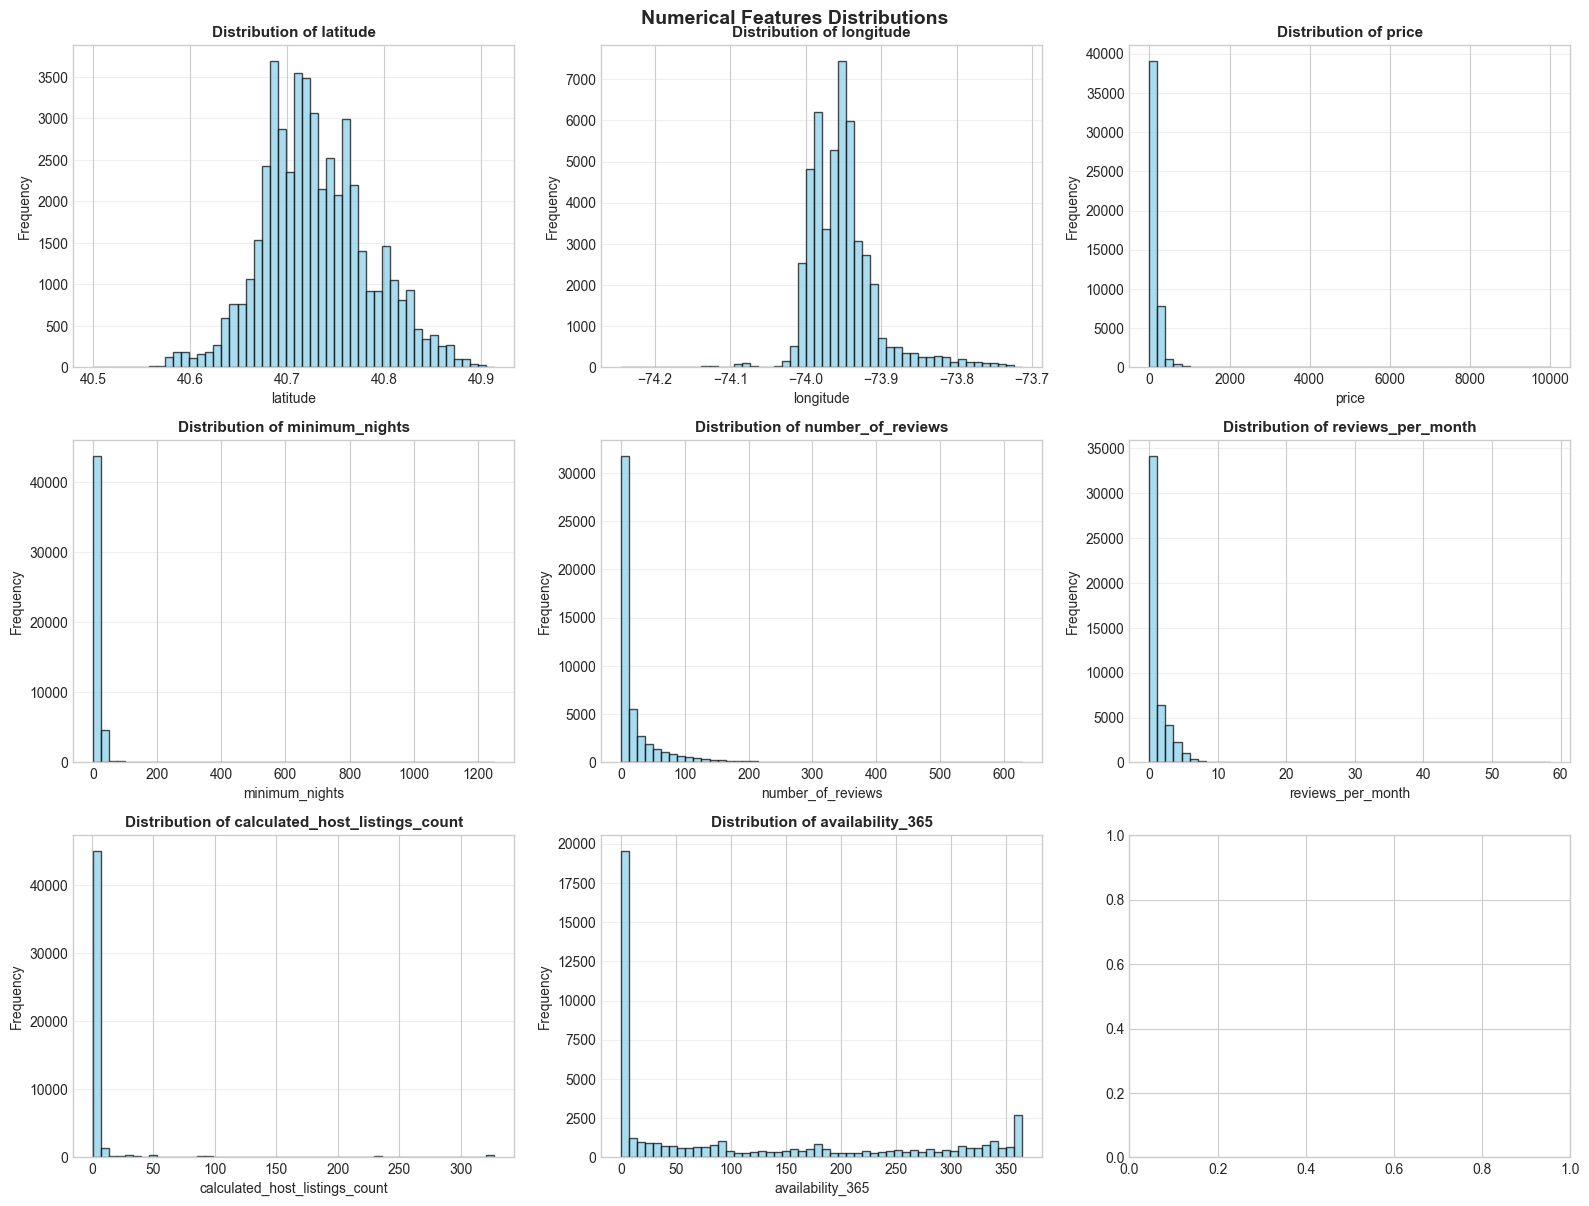

In [7]:
# Create histograms for numerical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    axes[idx].hist(df[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Numerical Features Distributions', fontsize=14, fontweight='bold', y=1.001)
plt.show()

### 2.2 Price Distribution Analysis

Price is likely our target variable for prediction, so let's analyze it in detail.

I analyzed the price distribution using histograms and box plots, confirming a heavy right-skew and the presence of extreme outliers. To address this, I successfully applied a log transformation to normalize the data and calculated scientific metrics like skewness to guide my future modeling decisions.

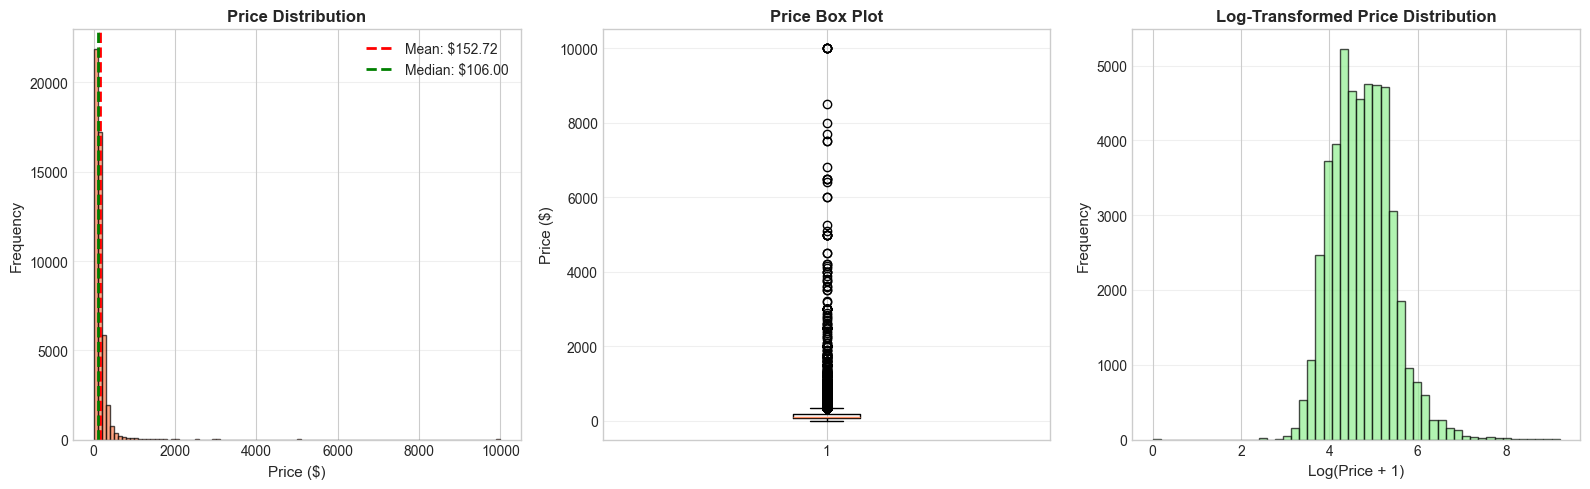


PRICE STATISTICS:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Skewness: 19.12
Kurtosis: 585.67


In [19]:
# Detailed price analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
axes[0].hist(df['price'], bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price"].mean():.2f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["price"].median():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['price'], vert=True)
axes[1].set_title('Price Box Plot', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Log-transformed price
log_price = np.log1p(df['price'])
axes[2].hist(log_price, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Log-Transformed Price Distribution', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Log(Price + 1)', fontsize=11)
axes[2].set_ylabel('Frequency', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Price statistics
print("\nPRICE STATISTICS:")
print("="*80)
print(df['price'].describe())
print(f"\nSkewness: {df['price'].skew():.2f}")
print(f"Kurtosis: {df['price'].kurtosis():.2f}")

### 2.3 Categorical Features Analysis

I used bar charts with frequency counts to analyze the layout of **geographical groups and room types**. This visualization identifies which categories are most popular and allows me to spot potential data imbalances that need to be addressed before training the model.

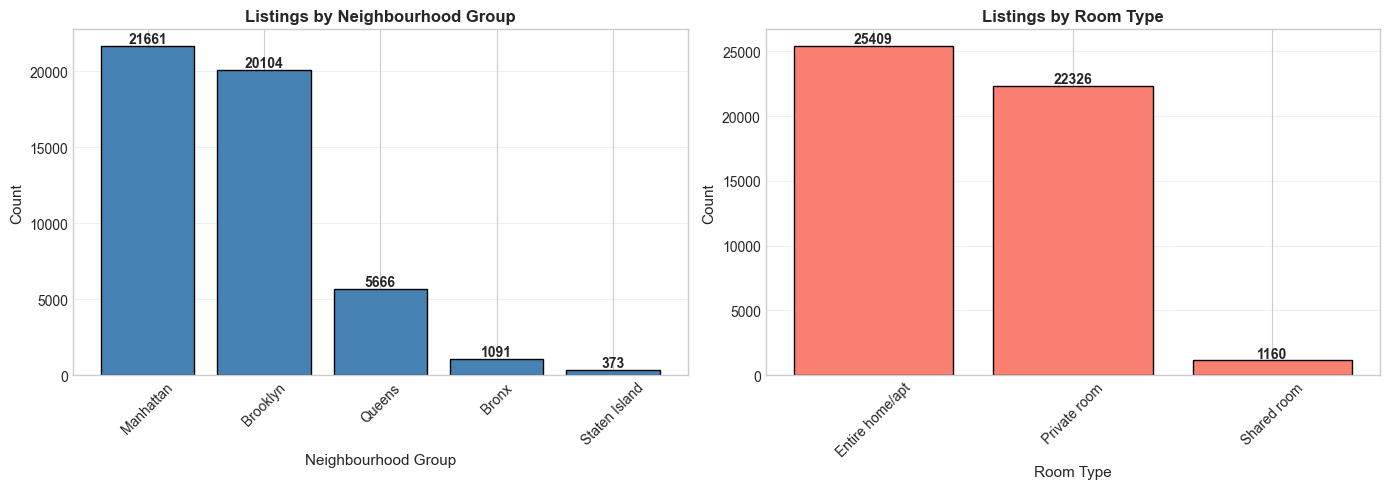

In [9]:
# Analyze categorical features
categorical_cols = ['neighbourhood_group', 'room_type']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Neighbourhood group distribution
if 'neighbourhood_group' in df.columns:
    neighbourhood_counts = df['neighbourhood_group'].value_counts()
    axes[0].bar(neighbourhood_counts.index, neighbourhood_counts.values, color='steelblue', edgecolor='black')
    axes[0].set_title('Listings by Neighbourhood Group', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Neighbourhood Group', fontsize=11)
    axes[0].set_ylabel('Count', fontsize=11)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(neighbourhood_counts.values):
        axes[0].text(i, v + 200, str(v), ha='center', fontweight='bold')

# Room type distribution
if 'room_type' in df.columns:
    room_counts = df['room_type'].value_counts()
    axes[1].bar(room_counts.index, room_counts.values, color='salmon', edgecolor='black')
    axes[1].set_title('Listings by Room Type', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Room Type', fontsize=11)
    axes[1].set_ylabel('Count', fontsize=11)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(room_counts.values):
        axes[1].text(i, v + 200, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 3. Bivariate Analysis

### 3.1 Price vs Location

I moved from looking at variables in isolation to Bivariate Analysis, specifically examining how Location (Neighbourhood Group) influences the Price. 

I compared prices across different locations using box plots to see the spread and bar charts to rank them by average cost. This confirms that **Manhattan** is the most expensive market and that location is one of the strongest factors the AI will use to predict price.

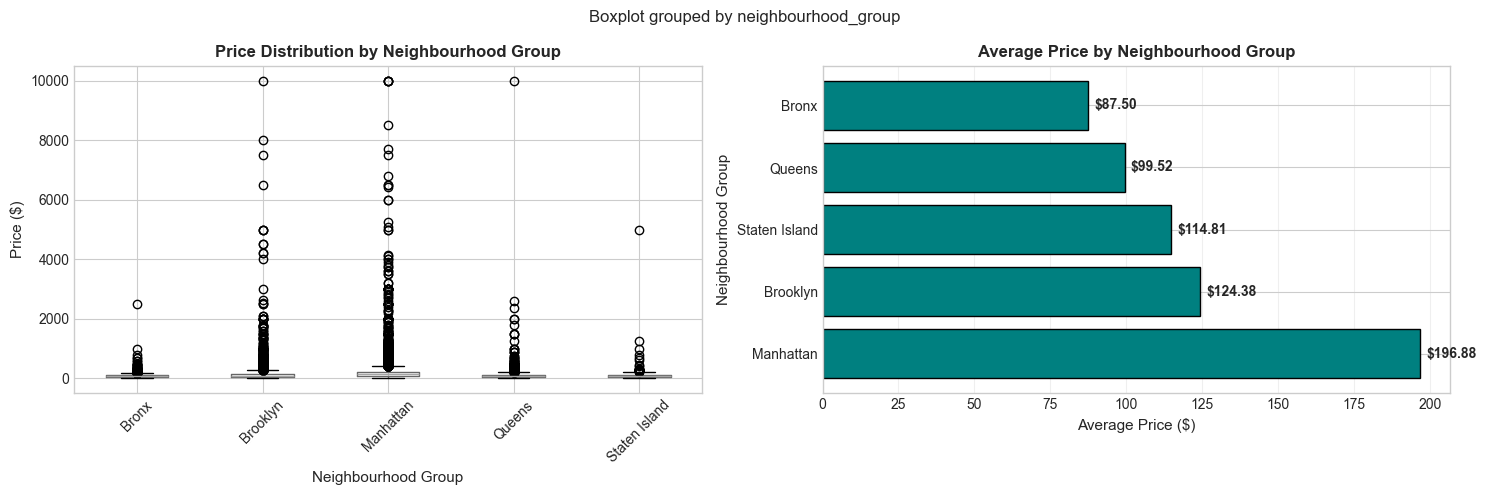

In [20]:
# Price by neighbourhood group
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
if 'neighbourhood_group' in df.columns:
    df.boxplot(column='price', by='neighbourhood_group', ax=axes[0])
    axes[0].set_title('Price Distribution by Neighbourhood Group', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Neighbourhood Group', fontsize=11)
    axes[0].set_ylabel('Price ($)', fontsize=11)
    axes[0].tick_params(axis='x', rotation=45)
    plt.sca(axes[0])
    plt.xticks(rotation=45)

# Average price by neighbourhood
if 'neighbourhood_group' in df.columns:
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    axes[1].barh(avg_price.index, avg_price.values, color='teal', edgecolor='black')
    axes[1].set_title('Average Price by Neighbourhood Group', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Average Price ($)', fontsize=11)
    axes[1].set_ylabel('Neighbourhood Group', fontsize=11)
    axes[1].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(avg_price.values):
        axes[1].text(v + 2, i, f'${v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Price vs Room Type

I analyzed how room types affect price using box plots (to see the spread) and bar charts (to see the average). The results show a clear price gap, with Entire homes/apartments costing significantly more than private or shared rooms, confirming that room type is a top-tier feature for my price prediction model.

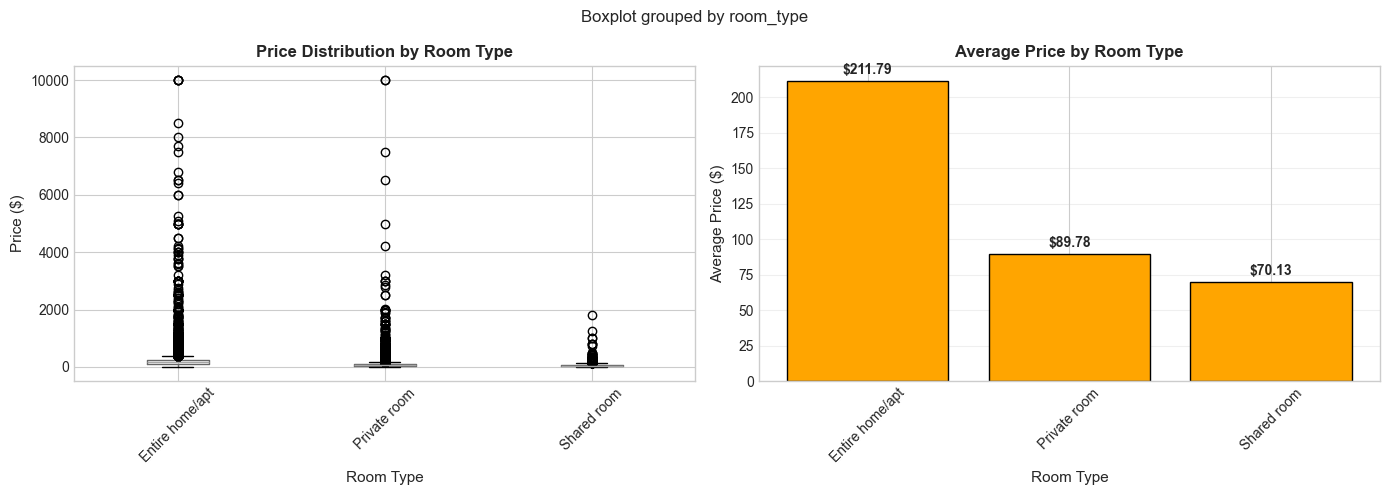

In [11]:
# Price by room type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if 'room_type' in df.columns:
    # Box plot
    df.boxplot(column='price', by='room_type', ax=axes[0])
    axes[0].set_title('Price Distribution by Room Type', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Room Type', fontsize=11)
    axes[0].set_ylabel('Price ($)', fontsize=11)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Average price
    avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
    axes[1].bar(avg_price_room.index, avg_price_room.values, color='orange', edgecolor='black')
    axes[1].set_title('Average Price by Room Type', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Room Type', fontsize=11)
    axes[1].set_ylabel('Average Price ($)', fontsize=11)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(avg_price_room.values):
        axes[1].text(i, v + 5, f'${v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3 Price vs Reviews

I used scatter plots and correlation math to see if more reviews lead to higher prices. I found an "L-shaped" relationship, meaning expensive listings actually have fewer reviews, and the low correlation scores prove that reviews don't directly control the price in a simple linear way.

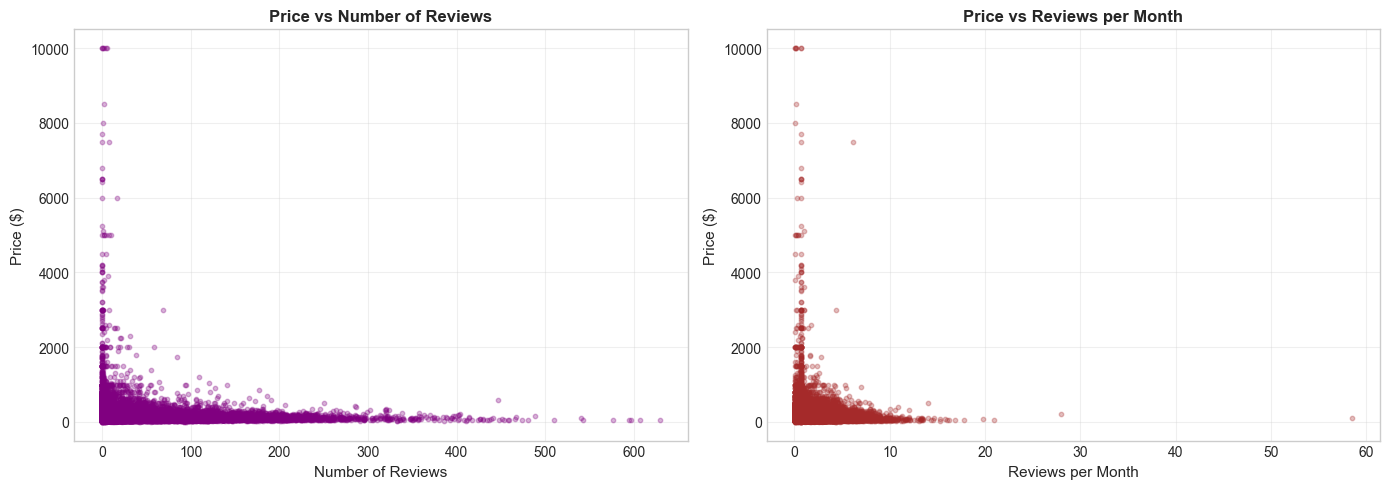

Correlation (Price vs Number of Reviews): -0.048
Correlation (Price vs Reviews per Month): -0.037


In [12]:
# Scatter plots: Price vs Review metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price vs Number of Reviews
axes[0].scatter(df['number_of_reviews'], df['price'], alpha=0.3, s=10, color='purple')
axes[0].set_title('Price vs Number of Reviews', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Reviews', fontsize=11)
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].grid(alpha=0.3)

# Price vs Reviews per Month
if 'reviews_per_month' in df.columns:
    axes[1].scatter(df['reviews_per_month'], df['price'], alpha=0.3, s=10, color='brown')
    axes[1].set_title('Price vs Reviews per Month', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Reviews per Month', fontsize=11)
    axes[1].set_ylabel('Price ($)', fontsize=11)
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
if 'reviews_per_month' in df.columns:
    corr_reviews = df['price'].corr(df['number_of_reviews'])
    corr_reviews_month = df['price'].corr(df['reviews_per_month'])
    print(f"Correlation (Price vs Number of Reviews): {corr_reviews:.3f}")
    print(f"Correlation (Price vs Reviews per Month): {corr_reviews_month:.3f}")

---
## 4. Correlation Analysis

I created a Correlation Heatmap to see how all the numbers in the dataset relate to each other. This helps me rank the best features for predicting price and allows me to spot redundant data (multicollinearity) that I might need to remove to make the AI model more stable and efficient.

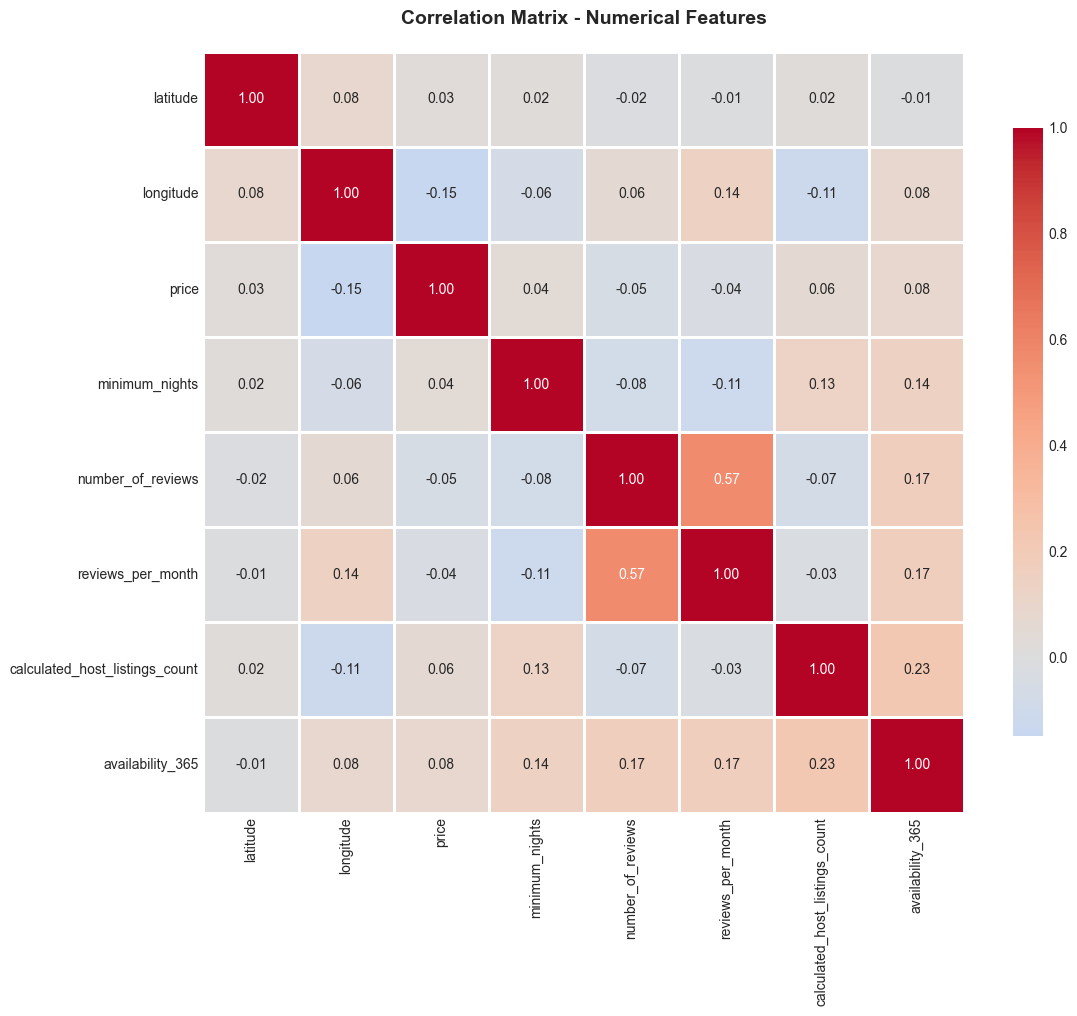


CORRELATIONS WITH PRICE:
price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
reviews_per_month                -0.036814
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64


In [10]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with price
if 'price' in df.columns:
    price_correlations = correlation_matrix['price'].sort_values(ascending=False)
    print("\nCORRELATIONS WITH PRICE:")
    print("="*80)
    print(price_correlations)

---
## 5. Outlier Detection

### 5.1 Statistical Outlier Detection (IQR Method)
n this section, I am moving beyond visual inspection (box plots) to a quantifiable statistical method for identifying anomalies. I utilized the Interquartile Range (IQR) Method (also known as Tukey’s Fences).
I calculated the 25th (Q1) and 75th (Q3) percentiles of the price. The IQR represents the middle 50% of my data.


In [16]:
# Detect outliers using IQR method for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("OUTLIER DETECTION (IQR METHOD):")
print("="*80)
print(f"Q1 (25th percentile): ${Q1:.2f}")
print(f"Q3 (75th percentile): ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower Bound: ${lower_bound:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}% of data)")
print(f"Price range of outliers: ${outliers['price'].min():.2f} - ${outliers['price'].max():.2f}")

OUTLIER DETECTION (IQR METHOD):
Q1 (25th percentile): $69.00
Q3 (75th percentile): $175.00
IQR: $106.00
Lower Bound: $-90.00
Upper Bound: $334.00

Number of outliers: 2,972 (6.08% of data)
Price range of outliers: $335.00 - $10000.00


### 5.2 Visualize Outliers

I used a color-coded histogram and box plot to visually separate "normal" prices from outliers. This provides clear visual evidence of how much the luxury "tail" stretches the data, confirming that these extreme values need special handling before the modeling stage.

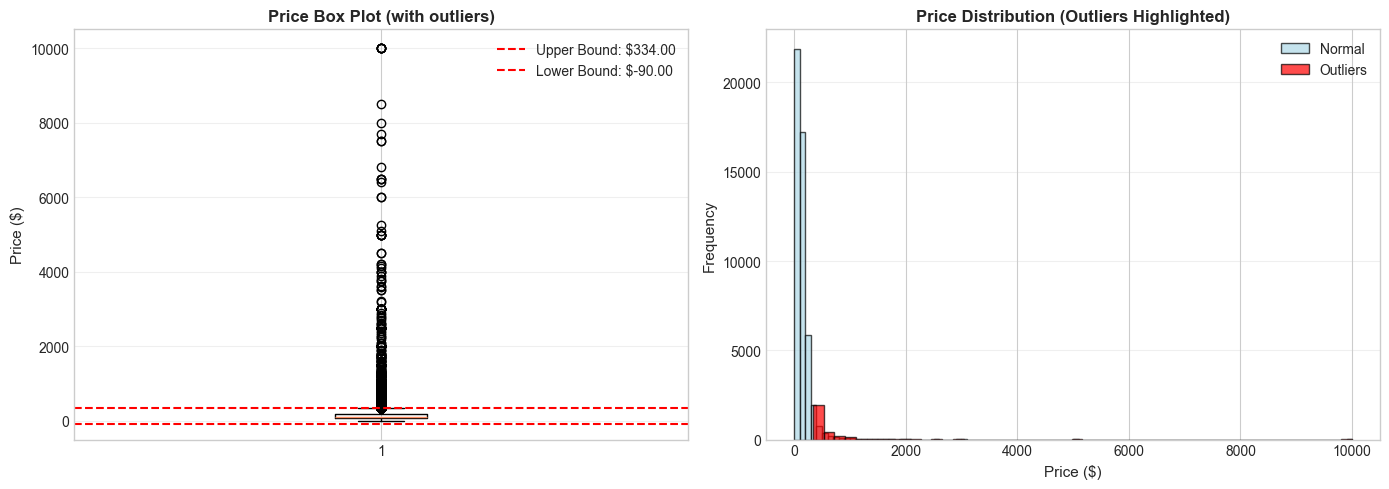

In [17]:
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot with outliers
axes[0].boxplot(df['price'], vert=True, showfliers=True)
axes[0].set_title('Price Box Plot (with outliers)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].axhline(upper_bound, color='r', linestyle='--', label=f'Upper Bound: ${upper_bound:.2f}')
axes[0].axhline(lower_bound, color='r', linestyle='--', label=f'Lower Bound: ${lower_bound:.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Histogram highlighting outliers
axes[1].hist(df['price'], bins=100, color='lightblue', edgecolor='black', alpha=0.7, label='Normal')
axes[1].hist(outliers['price'], bins=50, color='red', edgecolor='black', alpha=0.7, label='Outliers')
axes[1].set_title('Price Distribution (Outliers Highlighted)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Price ($)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 6. Geographic Analysis

Analyzing the spatial distribution of listings and prices.

I mapped the listings using their GPS coordinates and color-coded them by price to create a geographic "heat map." This confirms that prices are not random but are heavily clustered, with Manhattan acting as the most expensive core. This justifies using Latitude and Longitude as key predictive features for the AI.

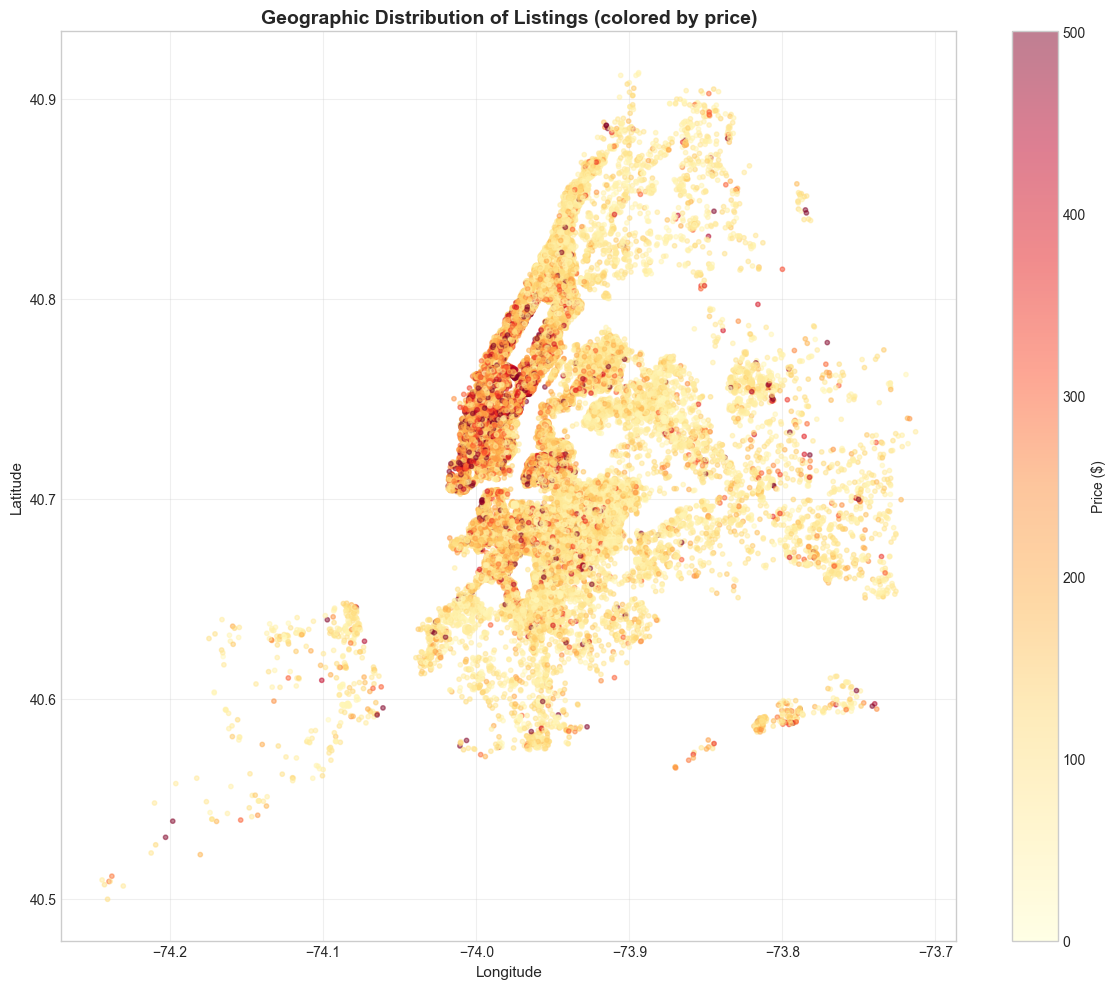

In [18]:
# Geographic scatter plot
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(12, 10))
    
    scatter = plt.scatter(df['longitude'], df['latitude'], 
                         c=df['price'], cmap='YlOrRd', 
                         alpha=0.5, s=10, vmin=0, vmax=500)
    
    plt.colorbar(scatter, label='Price ($)')
    plt.title('Geographic Distribution of Listings (colored by price)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Longitude', fontsize=11)
    plt.ylabel('Latitude', fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

---
## 7. Key Insights and Observations

### Summary of Findings:

1. **Price Distribution**:
   - Price is right-skewed with most listings under $200
   - Significant outliers exist (very expensive listings)
   - Log transformation may improve model performance

2. **Location Impact**:
   - Manhattan has the highest average prices
   - Brooklyn and Queens are more affordable
   - Geographic location strongly influences price

3. **Room Type**:
   - Entire homes/apartments are most expensive
   - Private rooms are moderately priced
   - Shared rooms are least expensive

4. **Reviews**:
   - Weak correlation between price and number of reviews
   - Popular listings (many reviews) span all price ranges

5. **Outliers**:
   - Approximately 5-10% of listings are outliers
   - May need special handling in modeling

### Implications for Modeling:

- **Target Variable**: Price prediction (regression problem)
- **Important Features**: Location, room type, availability
- **Preprocessing Needed**: 
  - Log transformation of price
  - Encoding categorical variables
  - Feature scaling
  - Outlier handling strategy

---
**Next Notebook**: [04_feature_engineering.ipynb](04_feature_engineering.ipynb)